In [1]:
import math
import numpy
from matplotlib import pyplot
%matplotlib inline

In [2]:
N=51
x_start,x_end=-1,2
y_start,y_end=-0.5,0.5
x=numpy.linspace(x_start,x_end,N)
y=numpy.linspace(y_start,y_end,N)
X,Y=numpy.meshgrid(x,y)

In [3]:
x=numpy.loadtxt('../AeroPython/lessons/resources/NACA0012_x.txt')
y=numpy.loadtxt('../AeroPython/lessons/resources/NACA0012_y.txt')
sigma=numpy.loadtxt('../AeroPython/lessons/resources/NACA0012_sigma.txt')
print (x)

[  9.99506682e-01   9.97535357e-01   9.93600488e-01   9.87717603e-01
   9.79909919e-01   9.70208251e-01   9.58650885e-01   9.45283433e-01
   9.30158651e-01   9.13336230e-01   8.94882559e-01   8.74870468e-01
   8.53378933e-01   8.30492774e-01   8.06302311e-01   7.80903012e-01
   7.54395117e-01   7.26883241e-01   6.98475961e-01   6.69285387e-01
   6.39426720e-01   6.09017800e-01   5.78178637e-01   5.47030938e-01
   5.15697630e-01   4.84302370e-01   4.52969062e-01   4.21821363e-01
   3.90982200e-01   3.60573280e-01   3.30714613e-01   3.01524039e-01
   2.73116759e-01   2.45604883e-01   2.19096988e-01   1.93697689e-01
   1.69507226e-01   1.46621067e-01   1.25129532e-01   1.05117441e-01
   8.66637700e-02   6.98413486e-02   5.47165669e-02   4.13491154e-02
   2.97917495e-02   2.00900806e-02   1.22823970e-02   6.39951199e-03
   2.46464256e-03   4.93317893e-04   4.93317893e-04   2.46464256e-03
   6.39951199e-03   1.22823970e-02   2.00900806e-02   2.97917495e-02
   4.13491154e-02   5.47165669e-02

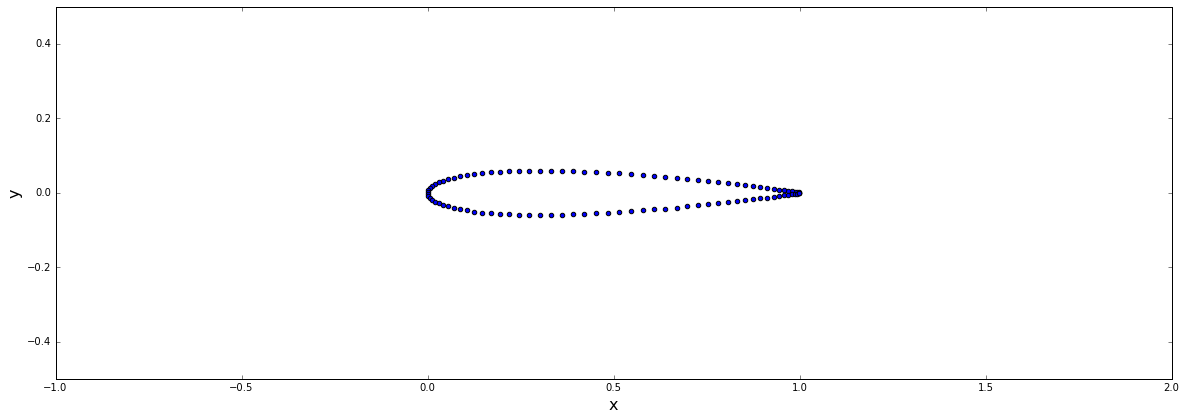

In [4]:
size = 20
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.scatter(x,y)

In [5]:
numpy.shape(x)

(100,)

In [7]:
u_inf = 1.0
u_freestream = u_inf * numpy.ones((N, N), dtype=float)
v_freestream = numpy.zeros((N, N), dtype=float)

psi_freestream = u_inf * Y

In [8]:
def get_velocity(strength,xs,ys,X,Y):
    u = strength/(2*numpy.pi)*(X-xs)/((X-xs)**2+(Y-ys)**2)
    v = strength/(2*numpy.pi)*(Y-ys)/((X-xs)**2+(Y-ys)**2)
    return u,v

In [9]:
def get_stream_function(strength,xs,ys,X,Y):
    psi = strength/(2*numpy.pi)*numpy.arctan2((Y-ys), (X-xs))
    return psi

In [10]:
u_1 = 0
v_1 = 0
psi_1= 0
for i in range(100):
    u_source,v_source = get_velocity(sigma[i],x[i],y[i],X,Y)
    u_1 = u_1 + u_source
    v_1 = v_1 + v_source


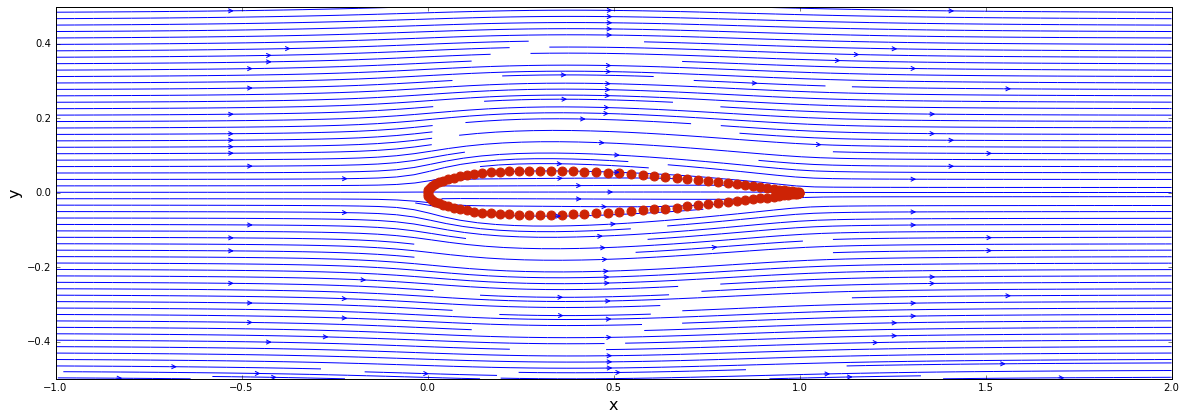

In [12]:
u_1=u_1+u_freestream
v_1=v_1+v_freestream

size = 20
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u_1, v_1, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x, y, color='#CD2305', s=80, marker='o')

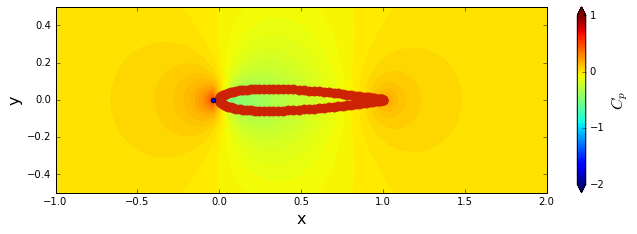

In [13]:
cp = 1.0 - (u_1**2+v_1**2)/u_inf**2
size = 10
pyplot.figure(figsize=(1.1*size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
contf = pyplot.contourf(X, Y, cp, levels=numpy.linspace(-2.0, 1.0, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])
pyplot.scatter(x, y, color='#CD2305', s=80, marker='o')
pyplot.scatter(X[1][numpy.argmax(cp)%N],Y[numpy.argmax(cp)//N][1])

In [14]:
numpy.max(cp)

0.47144366133162408

In [15]:
numpy.argmax(cp)%N

16

In [16]:
numpy.argmax(cp)//N

25